# Ejercicio 7

In [ ]:
import random 
import numpy as np
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator, FormatStrFormatter)
import plotly.express as px
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Default for numpy: edgeitems = 3, line_width = 80
np.set_printoptions(edgeitems = 14, linewidth = 300)

In [ ]:
# AGENTS must be lower than ELEMENTS
AGENTS = 2000
AGENTS_A = int(AGENTS * 0.7)
AGENTS_B = int(AGENTS * 0.25)
AGENTS_C = int(AGENTS * 0.05)
AGENTS_INF = int(AGENTS * 0.02)

# Magic number to format plots (5, 30, 5 etc.)
Y_PLOT_DIVIDEND = AGENTS / 5

In [ ]:
STATE_LEN = 200 
ELEMENTS = STATE_LEN * STATE_LEN
N_ITERATIONS = 5000

INFECTED = "_X"
AGENT_A = "A"
AGENT_B = "B"
AGENT_C = "C"
AGENT_KINDS = [AGENT_A, AGENT_B, AGENT_C]
EMPTY = "."
ZERO_TO_STATE_LEN = range(STATE_LEN)

INFECT_NEAR_P = 0.7
INFECT_FAR_P = 0.5

DIRECTIONS = [(0, 1), (0, -1),
              (1, 0), (-1, 0)]

In [ ]:
to_infect = np.random.choice( range(AGENTS), AGENTS_INF, replace=False )

In [ ]:
def setAgents(agents_len, agent, asigned):
    for i in range(agents_len):
        while True:
            x = np.random.choice(ZERO_TO_STATE_LEN, 1)[0]
            y = np.random.choice(ZERO_TO_STATE_LEN, 1)[0]
            
            if ( state[x][y] == EMPTY ):
                break

        state[x][y] = str(asigned) + "_" + agent
        
        if (asigned in to_infect):
            state[x][y] += INFECTED
            infected_pos.append( (asigned, x, y) )
        
        else:
            healthy_pos.append( (asigned, x, y) )
            
        asigned += 1
    
    return asigned

In [ ]:
state = [] 
infected_pos = []
healthy_pos = []
infected_pos_plot = []
healthy_pos_plot = []

In [ ]:
def setState():
    # State initialization
    for i in ZERO_TO_STATE_LEN:
        state.append([])
        for j in ZERO_TO_STATE_LEN:
            state[i].append(EMPTY)

    asigned = 0
    asigned = setAgents(AGENTS_A, AGENT_A, asigned)
    asigned = setAgents(AGENTS_B, AGENT_B, asigned)
    asigned = setAgents(AGENTS_C, AGENT_C, asigned)

    # print( np.matrix(state) ) 

In [ ]:
setState()
infected_pos_plot.append( infected_pos )
healthy_pos_plot.append( healthy_pos ) 

In [ ]:
def isPossibleMovement(state, x, y):
    if x<0 or y<0:
      return False
    try:
        state[x][y]
        return True
    except IndexError:
        return False

In [ ]:
def notPossibleMovement(state, x, y):
    for dx, dy in DIRECTIONS:
        if not isPossibleMovement(state, x + dx, y + dy):
            continue
            
        if state[x + dx][y + dy] == EMPTY:
            return False
    
    return True

In [ ]:
def _infect(state, next_state, elements, x, y, prob):
    for x, y in elements:
        if ( not isPossibleMovement(state, x, y) ) or (state[x][y] ==  EMPTY):
            continue
        
        agent_kind = state[x][y].split("_")[1]
        
        try:
            state[x][y].split("_")[2]
            continue
        except IndexError:
            pass
            
        if (random.random() < prob):
            next_state[x][y] += INFECTED

In [ ]:
def infect(state, next_state, x, y):
    near = [
        # dist 1
        (x, y + 1), (x + 1, y),  
        (x, y - 1), (x - 1, y), 
    
        # dist = 2
        (x, y + 2), (x + 2, y), (x, y - 2), (x - 2, y), 
        (x + 1, y + 1), (x + 1, y - 1), (x - 1, y - 1), (x - 1, y + 1),
    
        # dist = 3
        (x, y + 3), (x + 3, y), (x, y - 3), (x - 3, y),
        (x + 1, y + 2), (x + 2, y + 1), (x + 2, y - 1), (x + 1, y - 2),
        (x - 1, y - 2), (x - 2, y - 1), (x - 2, y + 1), (x - 1, y + 2),
    ]
    
    _infect(state, next_state, near, x, y, INFECT_NEAR_P)
        
    far = [
        # dist 4
        (x, y + 4), (x + 4, y), (x, y - 4), (x - 4, y),
        (x + 1, y + 3), (x + 1, y - 3), (x - 1, y - 3), (x - 1, y + 3),
        (x + 2, y + 2), (x + 2, y - 2), (x - 2, y - 2), (x - 2, y + 2),
        (x + 3, y + 1), (x + 3, y - 1), (x - 3, y - 1), (x - 3, y + 1),
        
        # dist 5
        (x, y + 5), (x + 5, y), (x, y - 5), (x - 5, y),
        (x + 1, y + 4), (x + 1, y - 4), (x - 1, y - 4), (x - 1, y + 4),
        (x + 2, y + 3), (x + 2, y - 3), (x - 2, y - 3), (x - 2, y + 3),
        (x + 3, y + 2), (x + 3, y - 2), (x - 3, y - 2), (x - 3, y + 2),
        (x + 4, y + 1), (x + 4, y - 1), (x - 4, y - 1), (x - 3, y + 1),
        
        # dist 6
        (x, y + 6), (x + 6, y), (x, y - 6), (x - 6, y),
        (x + 1, y + 5), (x + 1, y - 5), (x - 1, y - 5), (x - 1, y + 5),
        (x + 2, y + 4), (x + 2, y - 4), (x - 2, y - 4), (x - 2, y + 4),
        (x + 3, y + 3), (x + 3, y - 3), (x - 3, y - 3), (x - 3, y + 3),
        (x + 4, y + 2), (x + 4, y - 2), (x - 4, y - 2), (x - 4, y + 2),
        (x + 5, y + 1), (x + 5, y - 1), (x - 5, y - 1), (x - 5, y + 1),
    ]
        
    _infect(state, next_state, far, x, y, INFECT_FAR_P)

In [ ]:
def simulatePandemic(state):
    for a in range(N_ITERATIONS):
        next_state = np.array( state ).tolist()        

        #Infection loop
        for i in ZERO_TO_STATE_LEN:
            for j in ZERO_TO_STATE_LEN:
                if state[i][j] == EMPTY:
                    continue
                if INFECTED in state[i][j]:
                  infect(state, next_state, i, j)

        state = np.array( next_state ).tolist()       

        # Movement loop
        for i in ZERO_TO_STATE_LEN:
            for j in ZERO_TO_STATE_LEN:
                if state[i][j] == EMPTY:
                    continue

                to_move = False
                
                # State is used for iteration
                if AGENT_A in state[i][j]:
                    to_move = True
                
                elif (AGENT_B in state[i][j]) and (a % 2 == 0):
                    to_move = True
                
                elif AGENT_C in state[i][j] and (a % 4 == 0):
                    to_move = True
                    
                if notPossibleMovement(next_state, i, j) or (not to_move):
                    continue 
                    
                dx = 0
                dy = 0
                #  Next_state is used for updating movement
                while next_state[i + dx][j + dy] != EMPTY:
                    dir_i = np.random.choice( range( len(DIRECTIONS) ), 1 )[0]
                    dx, dy = DIRECTIONS[dir_i]
                    
                    if not isPossibleMovement(next_state, i + dx, j + dy):
                        dx = 0
                        dy = 0
                        continue
                        
                next_state[i][j] = EMPTY
                next_state[i + dx][j + dy] = state[i][j]
           
        
        infected = []
        healthy = []
        # Stats loop
        for i in ZERO_TO_STATE_LEN:
            for j in ZERO_TO_STATE_LEN:
                if next_state[i][j] == EMPTY:
                    continue

                agent_id = next_state[i][j].split("_")[0]
                    
                if INFECTED in next_state[i][j]:
                    infected.append( (agent_id, i, j) )
            
                else:
                    healthy.append( (agent_id, i, j) )
            
        infected_pos_plot.append(infected)
        healthy_pos_plot.append(healthy) 
        state = np.array( next_state ).tolist()       
        
        if len(infected) == AGENTS:
            return a + 1
    
    
    return N_ITERATIONS

In [ ]:
def generateDataframe():
  df = pd.DataFrame(healthy_pos_plot[0])
  df['TimeFrame'] = 0
  df['Infected'] = 0
  df['Healthy']= 1

  temp_df_list = []
  for i in range(1, N_ITER_AUX):
    temp_df = pd.DataFrame(healthy_pos_plot[i])
    temp_df['TimeFrame']=i
    temp_df['Infected']=0
    temp_df['Healthy']=1
    temp_df_list.append(temp_df)
  
  df = df.append(temp_df_list, ignore_index=True)

  temp_df_list = []
  for i in range(0, N_ITER_AUX):
    temp_df = pd.DataFrame(infected_pos_plot[i])
    temp_df['TimeFrame']=i
    temp_df['Infected']=1
    temp_df['Healthy']=0
    temp_df_list.append(temp_df)
    
  df = df.append(temp_df_list, ignore_index=True)

  df = df.rename( columns={0:'id', 1:'x', 2:'y'} )
  df['id'] = df['id'].astype(int)
  return df

In [ ]:
def animation(df):
  fig = px.scatter(df, x="x", y="y", animation_frame="TimeFrame", color="Infected", animation_group="id", hover_name="id",
            log_x=False, size_max=5, range_x=[0,200], range_y=[0,200],width = 700, height= 700, 
            color_continuous_scale=[(0.00, "green"),(0.5, "green"),(0.5, "red"),(1.0, "red")])
  
  fig.update_layout(coloraxis_colorbar=dict(
      title="Estado",
      tickvals=[0.25,0.75],
      ticktext=["Sano","Infectado"],
      lenmode="pixels", len=100,
  ))

  fig.show()

In [ ]:
def plot1(df, y_axis, title, x0, x1):
  y = df
  x = df.index

  # Size and aspect ratio
  grafico, ax = plt.subplots(figsize = (13, 8));

  # Axis
  plt.xlabel("Instancia", fontsize = 16)
  plt.ylabel(y_axis, fontsize = 16)

  # Title
  plt.title(title, fontsize = 20)

  # Axis limits
  plt.xlim([x0, x1]);
  plt.ylim([0, AGENTS]);

  plt.fill_between(x, y)

In [ ]:
def plot2(df, tipo = ""):
  df_plot3 = pd.DataFrame( - ( df[ df['Infected'] == 1 ].groupby('id').count()['Infected'] - N_ITER_AUX ) ).reset_index()
  df_plot3 = df_plot3.groupby('Infected').count().reset_index() 

  # Size and aspect ratio
  grafico, ax = plt.subplots(figsize = (13, 8));

  # Axis
  plt.xlabel("Instancia", fontsize = 16)
  plt.ylabel("Cantidad de infectados", fontsize = 16)

  # Title
  if ( len(tipo) > 0 ):
    plt.title("Agentes de tipo "+ tipo + " infectados en cada instancia", fontsize = 20)
  
  else:
    plt.title("Nuevos infectados en cada instancia", fontsize = 20)

  # Axis limit
  plt.xlim([0, N_ITER_AUX]);
  plt.ylim([0, Y_PLOT_DIVIDEND ]);
  
  plt.bar( df_plot3['Infected'], df_plot3['id'] )

In [ ]:
def getDfA(df):
  return df.loc[ df["id"] < AGENTS_A ]

In [ ]:
def getDfB(df):
  return df.loc[ (df["id"] >= AGENTS_A) & ( df["id"] < (AGENTS - AGENTS_C) ) ]

In [ ]:
def getDfC(df):
  return df.loc[ df["id"] >= (AGENTS - AGENTS_C) ]

In [ ]:
N_ITER_AUX = simulatePandemic(state) + 1

In [ ]:
df = generateDataframe()

In [ ]:
# for i in range(N_ITER_AUX):
#  print( str(i) + ": " + str( len( infected_pos_plot[i] ) ) + " + " + str( len( healthy_pos_plot[i] ) ) + " = " + str( len( healthy_pos_plot[i] ) + len( infected_pos_plot[i] ) )  )

In [ ]:
animation(df)

Output hidden; open in https://colab.research.google.com to view.

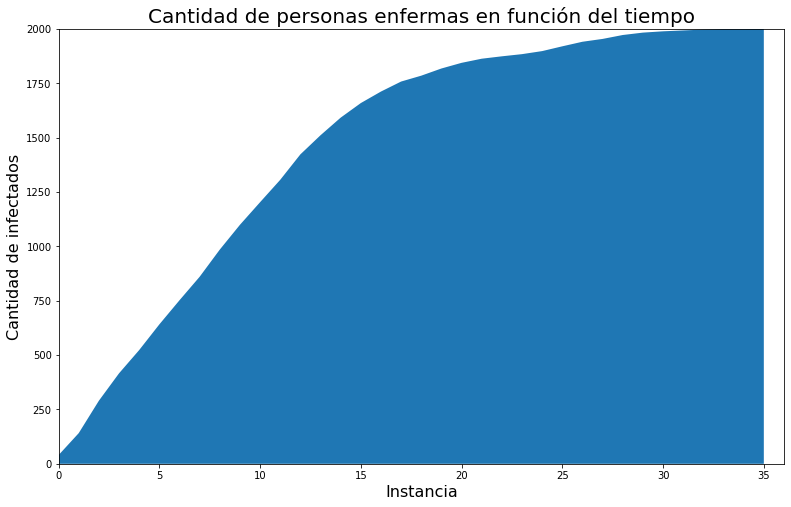

In [ ]:
plot1(df[ df["Infected"] == 1 ].groupby("TimeFrame").sum()["Infected"], "Cantidad de infectados", "Cantidad de personas enfermas en función del tiempo", 0, N_ITER_AUX)

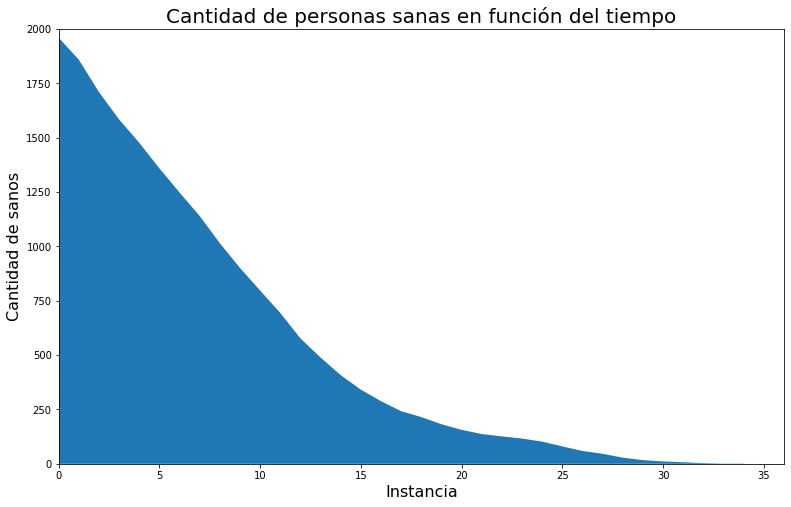

In [ ]:
plot1(df[ df["Infected"] == 0 ].groupby("TimeFrame").sum()["Healthy"], "Cantidad de sanos", "Cantidad de personas sanas en función del tiempo", 0, N_ITER_AUX)

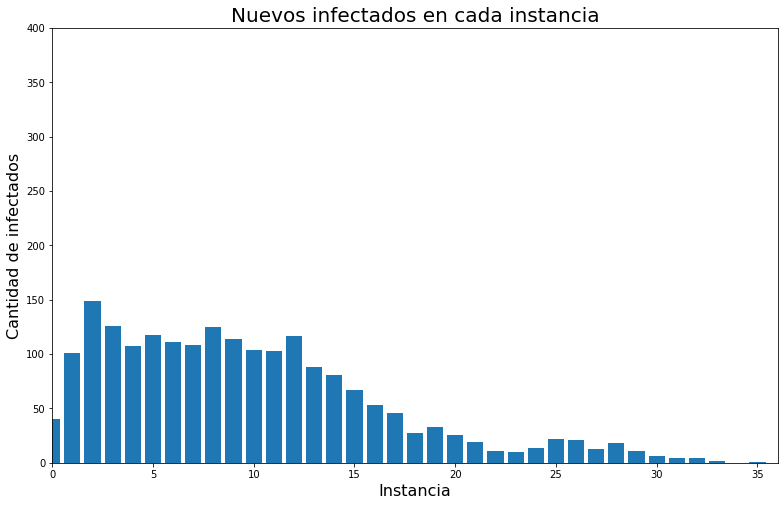

In [ ]:
plot2(df)

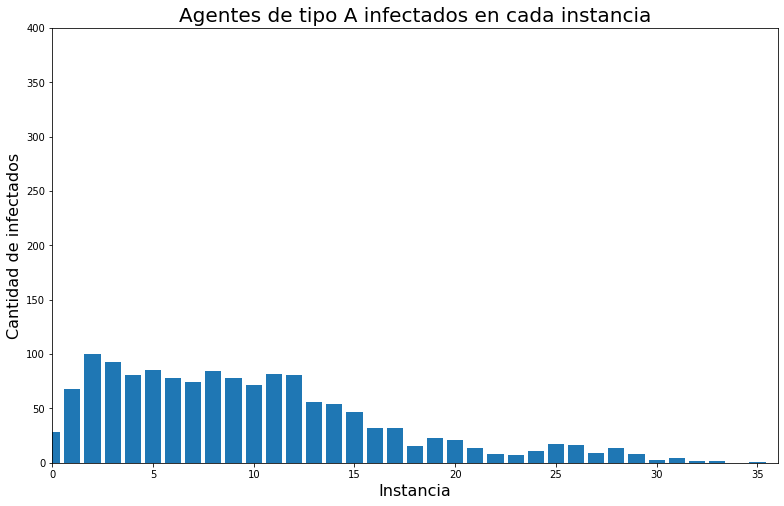

In [ ]:
plot2( getDfA(df), "A" )

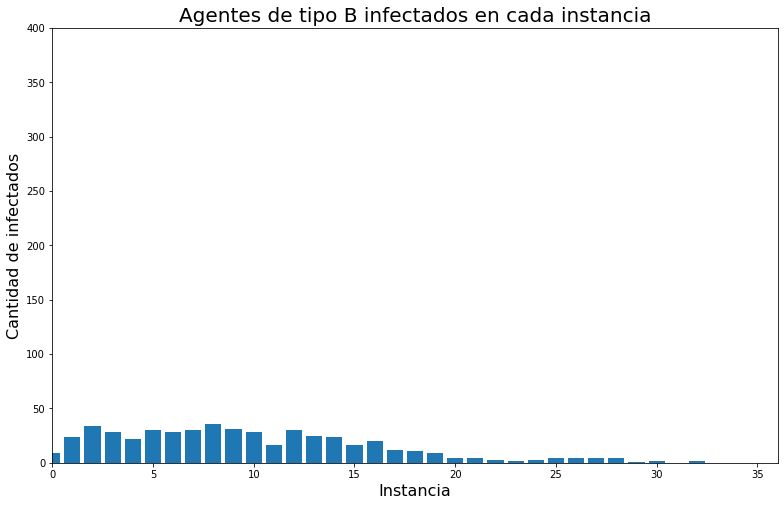

In [ ]:
plot2( getDfB(df), "B")

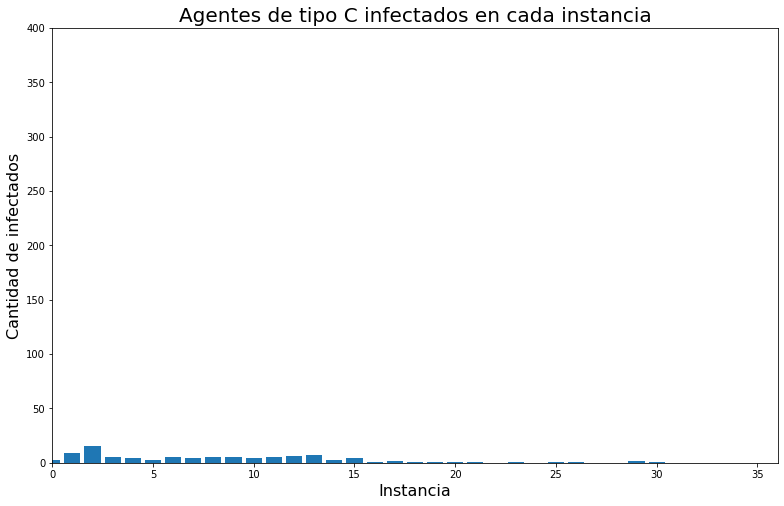

In [ ]:
plot2( getDfC(df), "C")

<br />

# Ejercicio 8

In [ ]:
AGENTS = 2000
AGENTS_A = int(AGENTS * 0.7)
AGENTS_B = int(AGENTS * 0.25)
AGENTS_C = int(AGENTS * 0.05)
AGENTS_INF = int(AGENTS * 0.02)
Y_PLOT_DIVIDEND = AGENTS / 5
to_infect = np.random.choice( range(AGENTS), AGENTS_INF, replace=False )

In [ ]:
P_KEEP_DIRECTION = 0.2

In [ ]:
state = [] 
infected_pos = []
healthy_pos = []
infected_pos_plot = []
healthy_pos_plot = []

In [ ]:
setState()
infected_pos_plot.append( infected_pos )
healthy_pos_plot.append( healthy_pos ) 

In [ ]:
# print( str( len( infected_pos ) ) + " " + str( len( healthy_pos ) ) )

In [ ]:
def simulatePandemic2(state):
    prev_move_list = {}

    for a in range(N_ITERATIONS):
        next_state = np.array( state ).tolist()        
        # Infection loop
        for i in ZERO_TO_STATE_LEN:
            for j in ZERO_TO_STATE_LEN:
                if state[i][j] == EMPTY:
                    continue
                if INFECTED in state[i][j]:
                  infect(state, next_state, i, j)

        state = np.array( next_state ).tolist()       

        # Movement loop
        for i in ZERO_TO_STATE_LEN:
            for j in ZERO_TO_STATE_LEN:
                if state[i][j] == EMPTY:
                    continue

                to_move = False
                
                if AGENT_A in state[i][j]:
                    to_move = True
                
                elif (AGENT_B in state[i][j]) and (a % 2 == 0):
                    to_move = True
                
                elif AGENT_C in state[i][j] and (a % 4 == 0):
                    to_move = True
                    
                if notPossibleMovement(next_state, i, j) or (not to_move):
                    continue 
                
                agent_id = state[i][j].split("_")[0]
                dx = 0
                dy = 0
              
                while next_state[i + dx][j + dy] != EMPTY:
                    #if there is a previous move
                    if agent_id in prev_move_list:
                      #if agent inist direction
                      if random.random() < P_KEEP_DIRECTION:
                          dx,dy = prev_move_list[agent_id]

                      #if agent does not keep direction
                      else:
                        dir_i = np.random.choice( range( len(DIRECTIONS) ), 1 )[0]
                        dx, dy = DIRECTIONS[dir_i]
                    else:
                      dir_i = np.random.choice( range( len(DIRECTIONS) ), 1 )[0]
                      dx, dy = DIRECTIONS[dir_i]
                    
                    #if movement is not possible look for anotherone, there is a possible movement garatized
                    if not isPossibleMovement(next_state, i + dx, j + dy):
                        dx = 0
                        dy = 0
                        continue
                # Whatever move it is, store it as new previous move
                prev_move_list[agent_id] = (dx, dy)
                        
                next_state[i][j] = EMPTY
                next_state[i + dx][j + dy] = state[i][j]
           
        
        infected = []
        healthy = []
        # Stats loop
        for i in ZERO_TO_STATE_LEN:
            for j in ZERO_TO_STATE_LEN:
                if next_state[i][j] == EMPTY:
                    continue

                agent_id = next_state[i][j].split("_")[0]
                    
                if INFECTED in next_state[i][j]:
                    infected.append( (agent_id, i, j) )
            
                else:
                    healthy.append( (agent_id, i, j) )
            
        infected_pos_plot.append(infected)
        healthy_pos_plot.append(healthy) 
        state = np.array( next_state ).tolist()       
        
        if len(infected) == AGENTS:
            return a + 1
            
    return N_ITERATIONS

In [ ]:
N_ITER_AUX = simulatePandemic2(state) + 1

In [ ]:
df2 = generateDataframe()

In [ ]:
#for i in range(N_ITER_AUX):
#  print( str(i) + ": " + str( len( infected_pos_plot[i] ) ) + " + " + str( len( healthy_pos_plot[i] ) ) + " = " + str( len( healthy_pos_plot[i] ) + len( infected_pos_plot[i] ) )  )

In [ ]:
animation(df2)

Output hidden; open in https://colab.research.google.com to view.

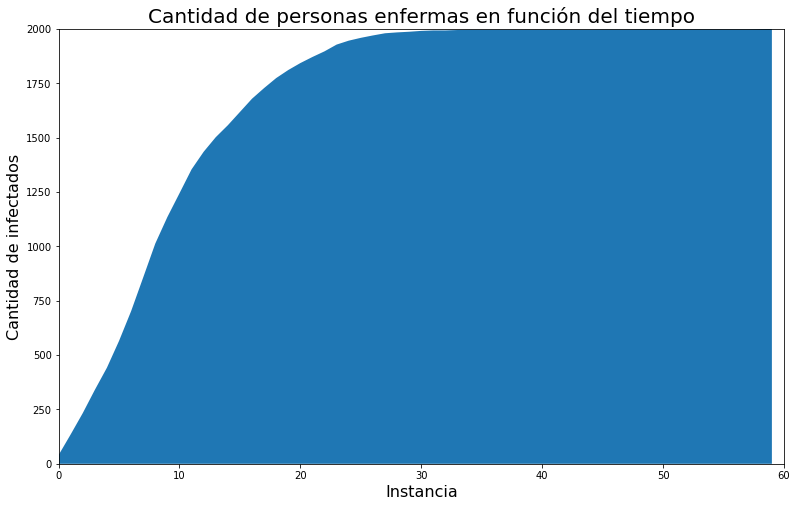

In [ ]:
plot1(df2[ df2["Infected"] == 1 ].groupby("TimeFrame").sum()["Infected"], "Cantidad de infectados", "Cantidad de personas enfermas en función del tiempo", 0, N_ITER_AUX)

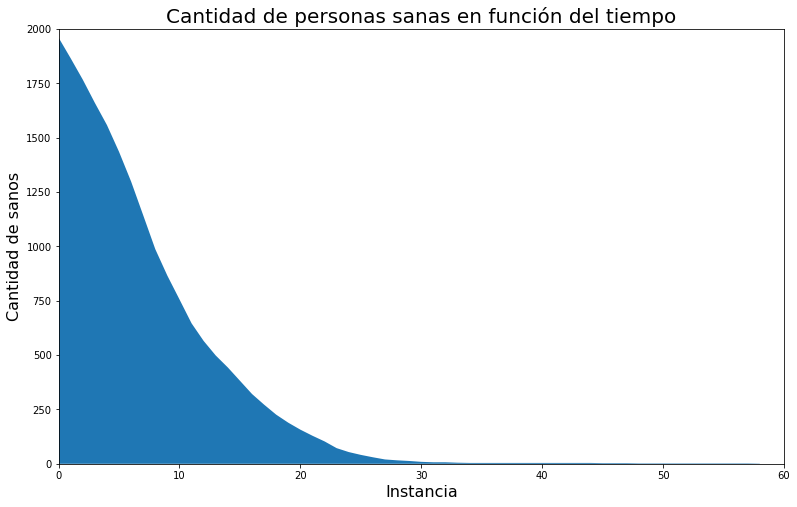

In [ ]:
plot1(df2[ df2["Infected"] == 0 ].groupby("TimeFrame").sum()["Healthy"], "Cantidad de sanos", "Cantidad de personas sanas en función del tiempo", 0, N_ITER_AUX)

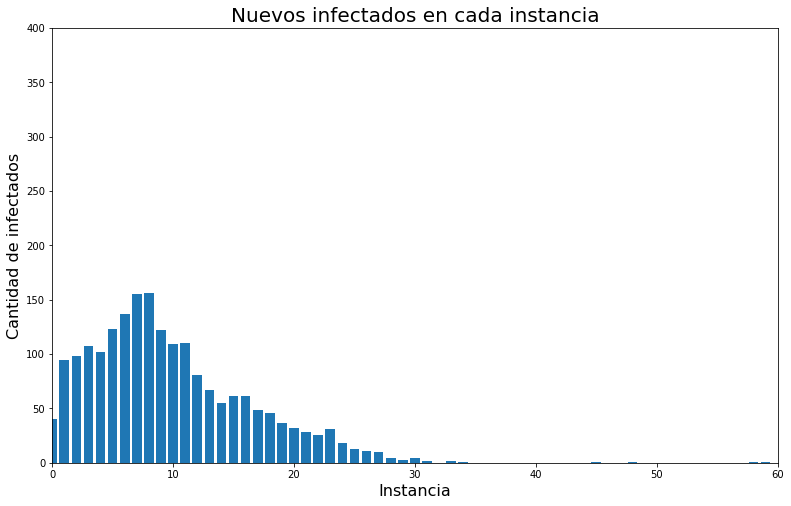

In [ ]:
plot2(df2)

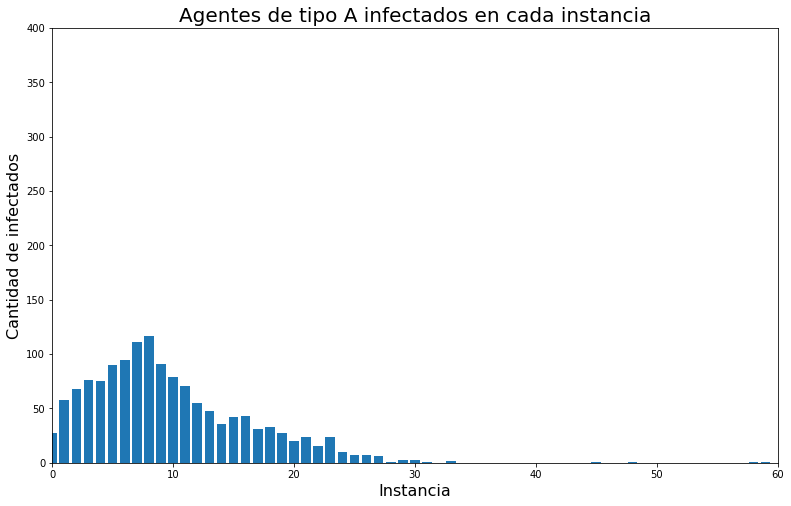

In [ ]:
plot2( getDfA(df2), "A" )

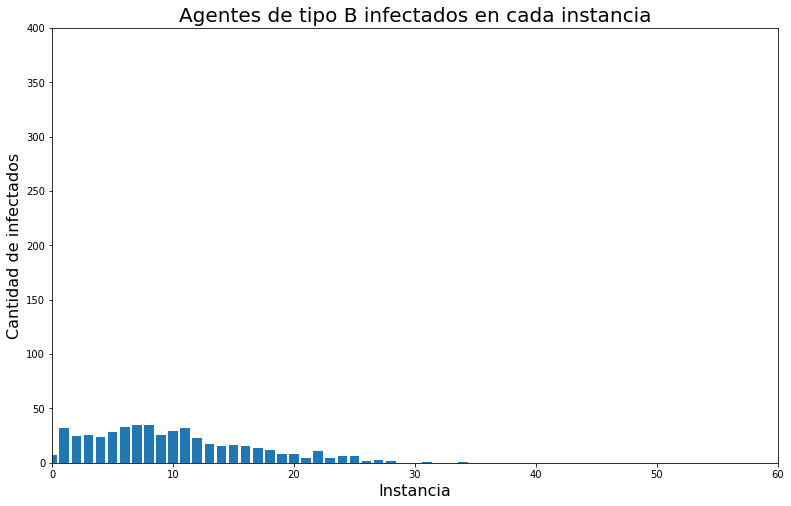

In [ ]:
plot2( getDfB(df2), "B" )

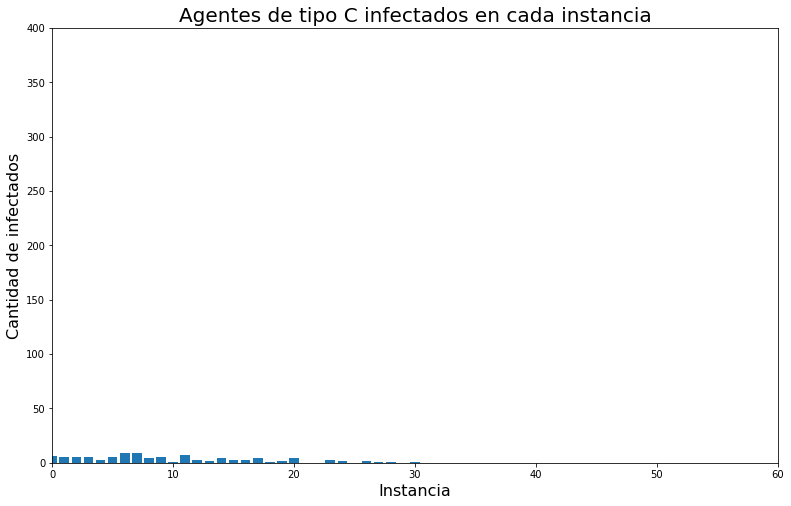

In [ ]:
plot2( getDfC(df2), "C" )

# Ejercicio 9

In [ ]:
AGENTS = 2000
N_ITERATIONS = 5000
AGENTS_A = int(AGENTS * 0.7)
AGENTS_B = int(AGENTS * 0.25)
AGENTS_C = int(AGENTS * 0.05)
AGENTS_INF = int(AGENTS * 0.02)
Y_PLOT_DIVIDEND = AGENTS / 5
to_infect = np.random.choice( range(AGENTS), AGENTS_INF, replace=False )

In [ ]:
ALFA = 20 
BETA = 0.1
inmunity = True
inmunity_dic = {}

In [ ]:
INFECTED = "_0"

In [ ]:
state = [] 
infected_pos = []
healthy_pos = []
infected_pos_plot = []
healthy_pos_plot = []

In [ ]:
infected_pos = []
healthy_pos = []
infection_instance = {}
heal_instance = {}
infection_instanceA = {}
heal_instanceA = {}
infection_instanceB = {}
heal_instanceB = {}
infection_instanceC = {}
heal_instanceC = {}

In [ ]:
setState()
infected_pos_plot.append( infected_pos )
healthy_pos_plot.append( healthy_pos ) 

In [ ]:
def isInfected(string):
  if len( string.split("_") ) == 3:
    return True
  
  else:
    return False

In [ ]:
def _infect3(state, next_state, elements, x, y, prob):
    for x, y in elements:
        if ( not isPossibleMovement(state, x, y) ) or (state[x][y] ==  EMPTY) or (isInfected(state[x][y])):
            continue
        
        id = next_state[x][y].split("_")[0]
        
        if inmunity == True and id in inmunity_dic and inmunity_dic[id] == True:
          continue

        if (random.random() < prob):
            next_state[x][y] += INFECTED

In [ ]:
def rectify_states(state, next_state, elements, x, y):
    for x, y in elements:
        
        if ( not isPossibleMovement(state, x, y) ) or (state[x][y] ==  EMPTY) or (isInfected(state[x][y])):
            continue
        
        if len(next_state[x][y].split("_"))>3:
          split = next_state[x][y].split("_")
          next_state[x][y] = split[0] + "_" + split[1] + "_" + split[2]

In [ ]:
def infect3(state, next_state, x, y):
    near = [
        # dist 1
        (x, y + 1), (x + 1, y),  
        (x, y - 1), (x - 1, y), 
    
        # dist = 2
        (x, y + 2), (x + 2, y), (x, y - 2), (x - 2, y), 
        (x + 1, y + 1), (x + 1, y - 1), (x - 1, y - 1), (x - 1, y + 1),
    
        # dist = 3
        (x, y + 3), (x + 3, y), (x, y - 3), (x - 3, y),
        (x + 1, y + 2), (x + 2, y + 1), (x + 2, y - 1), (x + 1, y - 2),
        (x - 1, y - 2), (x - 2, y - 1), (x - 2, y + 1), (x - 1, y + 2),
    ]
    
    _infect3(state, next_state, near, x, y, INFECT_NEAR_P)
        
    far = [
        # dist 4
        (x, y + 4), (x + 4, y), (x, y - 4), (x - 4, y),
        (x + 1, y + 3), (x + 1, y - 3), (x - 1, y - 3), (x - 1, y + 3),
        (x + 2, y + 2), (x + 2, y - 2), (x - 2, y - 2), (x - 2, y + 2),
        (x + 3, y + 1), (x + 3, y - 1), (x - 3, y - 1), (x - 3, y + 1),
        
        # dist 5
        (x, y + 5), (x + 5, y), (x, y - 5), (x - 5, y),
        (x + 1, y + 4), (x + 1, y - 4), (x - 1, y - 4), (x - 1, y + 4),
        (x + 2, y + 3), (x + 2, y - 3), (x - 2, y - 3), (x - 2, y + 3),
        (x + 3, y + 2), (x + 3, y - 2), (x - 3, y - 2), (x - 3, y + 2),
        (x + 4, y + 1), (x + 4, y - 1), (x - 4, y - 1), (x - 3, y + 1),
        
        # dist 6
        (x, y + 6), (x + 6, y), (x, y - 6), (x - 6, y),
        (x + 1, y + 5), (x + 1, y - 5), (x - 1, y - 5), (x - 1, y + 5),
        (x + 2, y + 4), (x + 2, y - 4), (x - 2, y - 4), (x - 2, y + 4),
        (x + 3, y + 3), (x + 3, y - 3), (x - 3, y - 3), (x - 3, y + 3),
        (x + 4, y + 2), (x + 4, y - 2), (x - 4, y - 2), (x - 4, y + 2),
        (x + 5, y + 1), (x + 5, y - 1), (x - 5, y - 1), (x - 5, y + 1),
    ]
        
    _infect3(state, next_state, far, x, y, INFECT_FAR_P)

    rectify_states(state, next_state, near, x, y)
    rectify_states(state, next_state, far, x, y)

In [ ]:
def recover(state, next_state, x, y):
  time_since_infected = state[x][y].split("_")[2]
  if int(time_since_infected) >= ALFA:
    if (random.random() < BETA):
        split = state[x][y].split("_")
        healed_agent = split[0]+"_"+split[1]
        next_state[x][y] = healed_agent
        if inmunity == True:
          id = split[0]
          inmunity_dic[ id ] = True
  else:
    new_time_since_infected = int(time_since_infected)+1
    split = state[x][y].split("_")
    still_ill_agent = split[0]+"_"+split[1]+"_"+str(new_time_since_infected)
    next_state[x][y] = still_ill_agent 

In [ ]:
def get_type_dic(type,agent_id):
  if type == "inf":
    if agent_id < AGENTS_A:
      return infection_instanceA
    if (AGENTS_A <= agent_id) and agent_id < (AGENTS - AGENTS_C):
      return infection_instanceB
    if agent_id >= (AGENTS - AGENTS_C):
      return infection_instanceC
  else:
    if agent_id < AGENTS_A:
      return heal_instanceA
    if (AGENTS_A <= agent_id) and (agent_id < (AGENTS - AGENTS_C)):
      return heal_instanceB
    if agent_id >= (AGENTS - AGENTS_C):
      return heal_instanceC

In [ ]:
def apply_counter_dic(dic,iter):
    if dic.get(iter, None) is not None:
      dic[iter] += 1
    else:
      dic[iter] = 1

In [ ]:
def simulatePandemic3(state):
    prev_move_list = {}
    infected = []
    healthy = []

    for a in range(N_ITERATIONS):
        next_state = np.array( state ).tolist()        
        # Recover loop
        for i in ZERO_TO_STATE_LEN:
            for j in ZERO_TO_STATE_LEN:
                if state[i][j] == EMPTY:
                    continue
                
                if isInfected(state[i][j]):
                  recover(state, next_state, i, j)

        state = np.array( next_state ).tolist()  

        # Infect loop
        for i in ZERO_TO_STATE_LEN:
            for j in ZERO_TO_STATE_LEN:
                if state[i][j] == EMPTY:
                    continue
                
                if isInfected(state[i][j]):
                  infect3(state, next_state, i, j)

        state = np.array( next_state ).tolist()       

        # Movement loop
        for i in ZERO_TO_STATE_LEN:
            for j in ZERO_TO_STATE_LEN:
                if state[i][j] == EMPTY:
                    continue

                to_move = False
                
                if AGENT_A in state[i][j]:
                    to_move = True
                
                elif (AGENT_B in state[i][j]) and (a % 2 == 0):
                    to_move = True
                
                elif AGENT_C in state[i][j] and (a % 4 == 0):
                    to_move = True
                    
                if notPossibleMovement(next_state, i, j) or (not to_move):
                    continue 
                
                agent_id = state[i][j].split("_")[0]
                dx = 0
                dy = 0
                
                while next_state[i + dx][j + dy] != EMPTY:
                    # If there is a previous move
                    if agent_id in prev_move_list:
                      #if agent inist direction
                      if random.random() < P_KEEP_DIRECTION:
                          dx,dy = prev_move_list[agent_id]
                    
                      # If agent does not keep direction
                      else:
                        dir_i = np.random.choice( range( len(DIRECTIONS) ), 1 )[0]
                        dx, dy = DIRECTIONS[dir_i]
                    else:
                      dir_i = np.random.choice( range( len(DIRECTIONS) ), 1 )[0]
                      dx, dy = DIRECTIONS[dir_i]

                    # If movement is not possible look for anotherone, there is a possible movement garatized
                    if not isPossibleMovement(next_state, i + dx, j + dy):
                        dx = 0
                        dy = 0
                        continue
                # Whatever move I do, store it as new old move
                prev_move_list[agent_id] = (dx,dy)
                        
                next_state[i][j] = EMPTY
                next_state[i + dx][j + dy] = state[i][j]
           
        prev_infected = infected
        prev_healthy = healthy
        infected = []
        healthy = []

        # Recap loop
        for i in ZERO_TO_STATE_LEN:
            for j in ZERO_TO_STATE_LEN:
                if next_state[i][j] == EMPTY:
                    continue

                agent_id = next_state[i][j].split("_")[0]
                    
                if isInfected(next_state[i][j]):
                    infected.append( (agent_id, i, j) )
                    
                    was_healthy = False
                    for value in prev_healthy:
                      if agent_id == value[0]:
                          was_healthy = True
                          break
                    if was_healthy == True:
                      apply_counter_dic(infection_instance,a)
                      type_dic = get_type_dic("inf",int(agent_id))
                      apply_counter_dic(type_dic,a)
                      
                else:
                    healthy.append( (agent_id, i, j) )

                    was_infected = False
                    for value in prev_infected:
                      if agent_id == value[0]:
                          was_infected = True
                          break
                    if was_infected == True:
                      apply_counter_dic(heal_instance, a)
                      type_dic = get_type_dic("heal",int(agent_id))
                      apply_counter_dic(type_dic,a)

        infected_pos_plot.append(infected)
        healthy_pos_plot.append(healthy) 
        state = np.array( next_state ).tolist()       
        
        if len(infected) == AGENTS or len(infected) == 0:
            return a + 1
            
    return N_ITERATIONS

In [ ]:
def plot3(dic, titulo, y_label):
  # Size and aspect ratio
  grafico, ax = plt.subplots(figsize = (13, 8));

  # Axis
  plt.xlabel("Instancia", fontsize = 16)
  plt.ylabel("Cantidad de infectados", fontsize = 16)

  # Título
  plt.title(titulo, fontsize = 20)

  # Axis limits
  plt.xlim([0, N_ITER_AUX]);
  plt.ylim([0, AGENTS / 20 ]);

  plt.bar( dic.keys(), dic.values() )

In [ ]:
N_ITER_AUX = simulatePandemic3(state) + 1

In [ ]:
df3 = generateDataframe()

In [ ]:
# N_ITER_AUX = 500
df3_aux = df3[ (df3["TimeFrame"] >= 0) & (df3["TimeFrame"] < 500) ]

In [ ]:
animation(df3_aux)

Output hidden; open in https://colab.research.google.com to view.

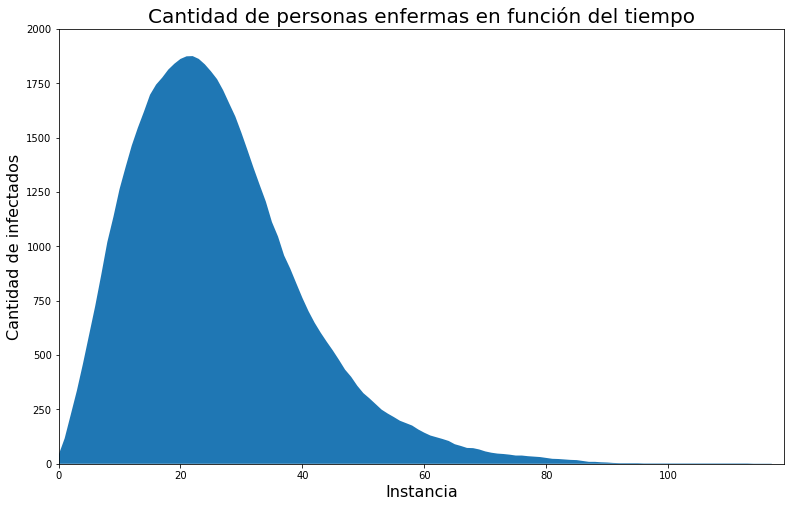

In [ ]:
plot1(df3_aux[ df3_aux["Infected"] == 1 ].groupby("TimeFrame").sum()["Infected"], "Cantidad de infectados", "Cantidad de personas enfermas en función del tiempo", 0, N_ITER_AUX)

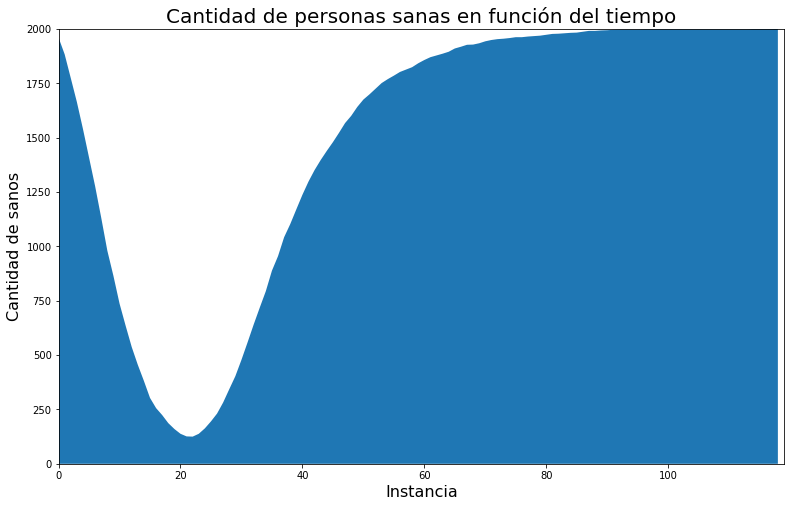

In [ ]:
plot1(df3_aux[ df3_aux["Infected"] == 0 ].groupby("TimeFrame").sum()["Healthy"], "Cantidad de sanos", "Cantidad de personas sanas en función del tiempo", 0, N_ITER_AUX)

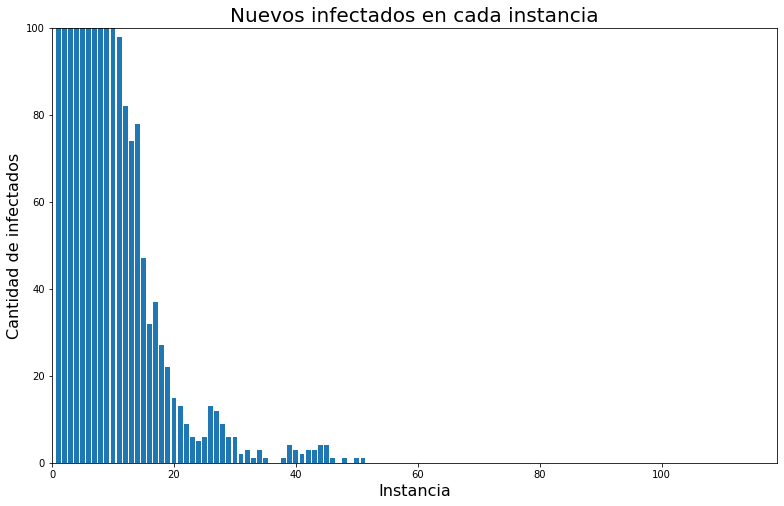

In [ ]:
plot3(infection_instance,"Nuevos infectados en cada instancia", "Cantidad de infectados")

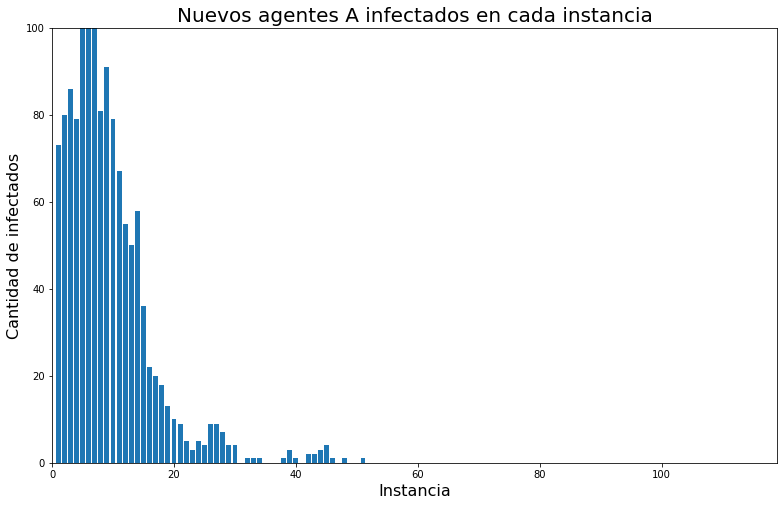

In [ ]:
plot3(infection_instanceA,"Nuevos agentes A infectados en cada instancia", "Cantidad de infectados")

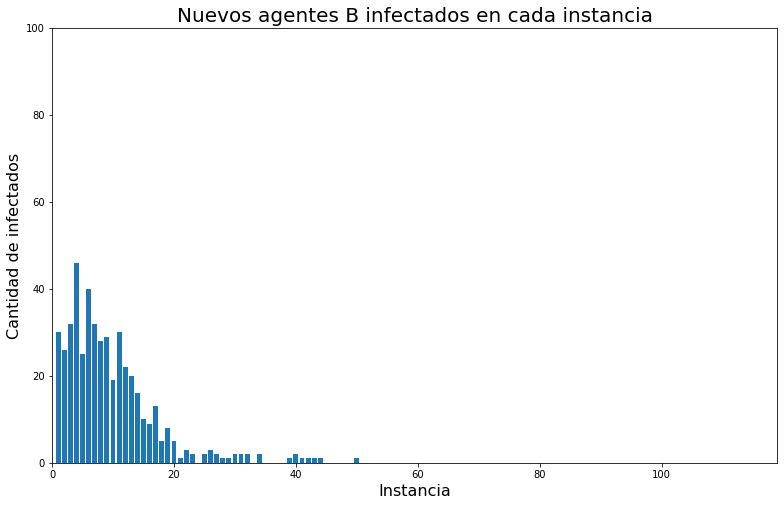

In [ ]:
plot3(infection_instanceB,"Nuevos agentes B infectados en cada instancia", "Cantidad de infectados")

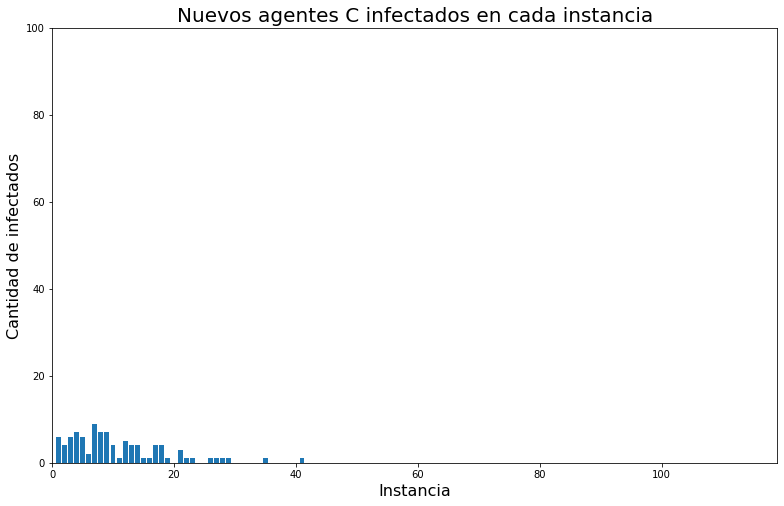

In [ ]:
plot3(infection_instanceC,"Nuevos agentes C infectados en cada instancia", "Cantidad de infectados")

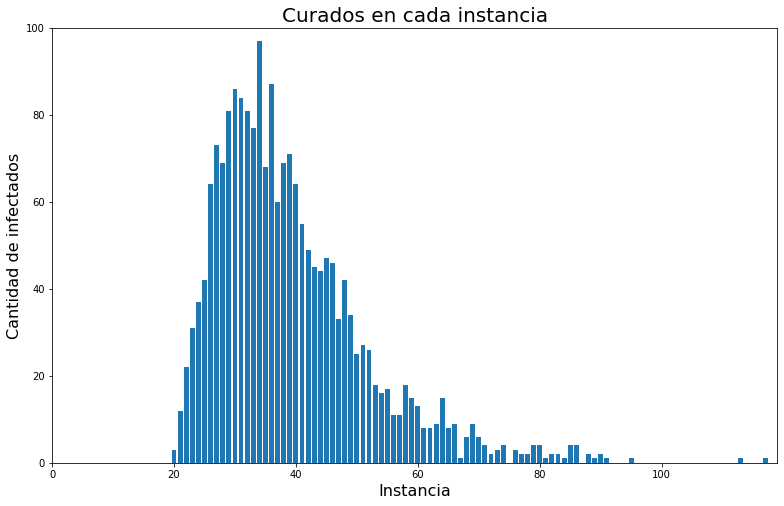

In [ ]:
  plot3(heal_instance,"Curados en cada instancia", "Cantidad de curados")

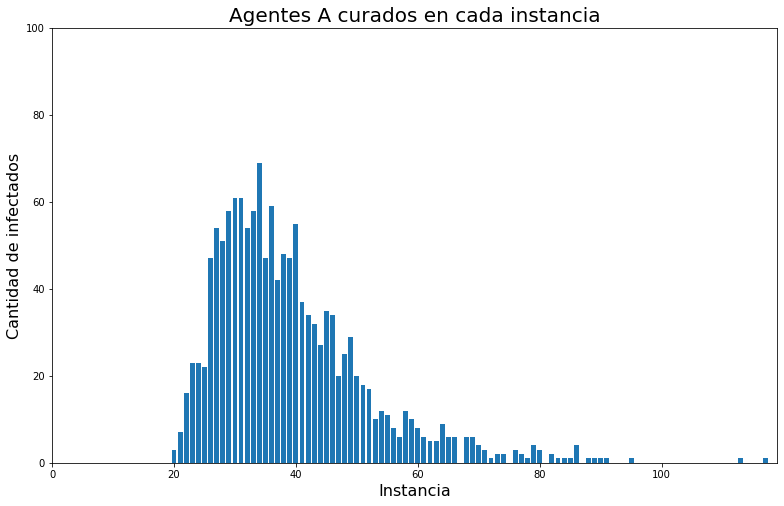

In [ ]:
plot3(heal_instanceA,"Agentes A curados en cada instancia", "Cantidad de curados")

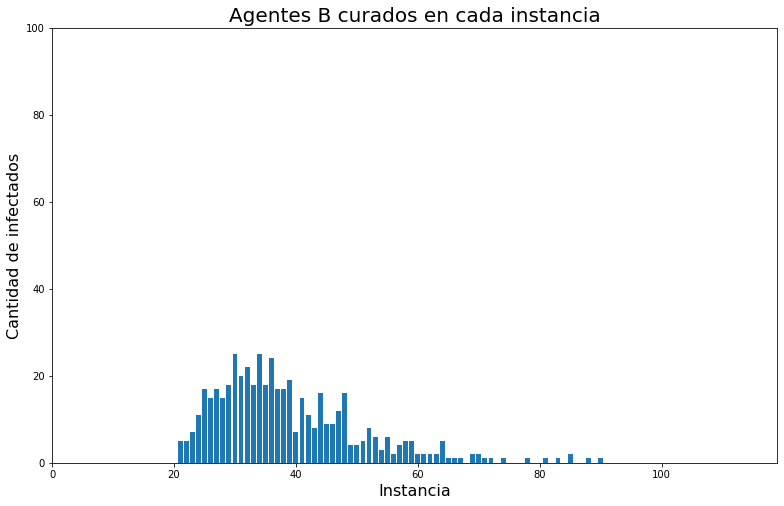

In [ ]:
plot3(heal_instanceB,"Agentes B curados en cada instancia", "Cantidad de curados")

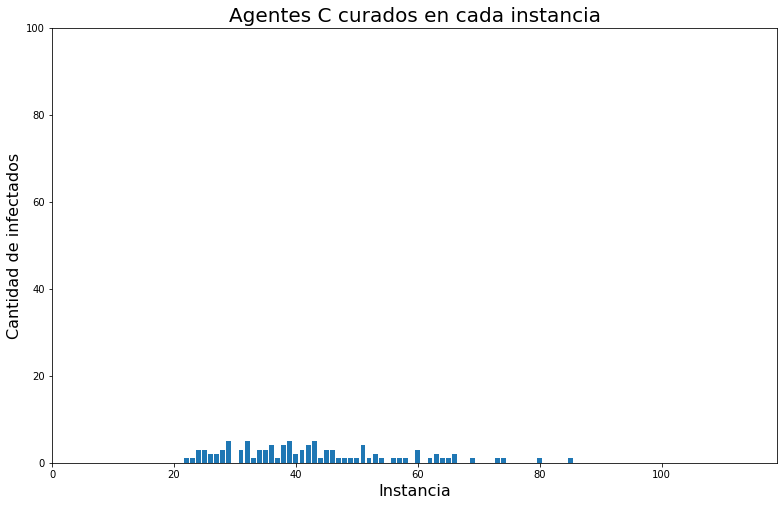

In [ ]:
plot3(heal_instanceC,"Agentes C curados en cada instancia", "Cantidad de curados")

In [ ]:
# Total infected
df_total = df3_aux.groupby("id").sum()
df_total = df_total[ df_total["Infected"] > 0 ]["Infected"]
len( df_total.index.to_list() )

2000

# Ejercicio 10

In [ ]:
LAMBDA = 0.5
INFECT_NEAR_P = 0.25
INFECT_FAR_P = 0.4

In [ ]:
AGENTS = 1000

AGENTS_A = int(AGENTS * 0.7)
AGENTS_B = int(AGENTS * 0.25)
AGENTS_C = int(AGENTS * 0.05)
AGENTS_INF = int(AGENTS * 0.02)
AGENTS_TO_MOVE = int(AGENTS * LAMBDA)
Y_PLOT_DIVIDEND = AGENTS / 5

ALFA = 20 
BETA = 0.1 
inmunity = True
inmunity_dic = {}

In [ ]:
to_infect = np.random.choice( range(AGENTS), AGENTS_INF, replace=False )
agents_to_move = np.random.choice( range(AGENTS), AGENTS_TO_MOVE, replace=False )

In [ ]:
to_move_dic = {} 
for a in agents_to_move:
  to_move_dic[a] = True

In [ ]:
state = [] 
infected_pos = []
healthy_pos = []
infected_pos_plot = []
healthy_pos_plot = []

In [ ]:
infected_pos = []
healthy_pos = []
infection_instance = {}
heal_instance = {}
infection_instanceA = {}
heal_instanceA = {}
infection_instanceB = {}
heal_instanceB = {}
infection_instanceC = {}
heal_instanceC = {}

In [ ]:
setState()
infected_pos_plot.append( infected_pos )
healthy_pos_plot.append( healthy_pos ) 

In [ ]:
def simulatePandemic4(state):
    prev_move_list = {}
    infected = []
    healthy = []

    for a in range(N_ITERATIONS):
        next_state = np.array( state ).tolist()        
        # Recover loop
        for i in ZERO_TO_STATE_LEN:
            for j in ZERO_TO_STATE_LEN:
                if state[i][j] == EMPTY:
                    continue
                
                if isInfected(state[i][j]):
                  recover(state, next_state, i, j)

        state = np.array( next_state ).tolist()  

        # Infect loop
        for i in ZERO_TO_STATE_LEN:
            for j in ZERO_TO_STATE_LEN:
                if state[i][j] == EMPTY:
                    continue
                
                if isInfected(state[i][j]):
                  infect3(state, next_state, i, j)

        state = np.array( next_state ).tolist()       

        # Movement loop
        for i in ZERO_TO_STATE_LEN:
            for j in ZERO_TO_STATE_LEN:
                if state[i][j] == EMPTY:
                    continue

                agent_id = state[i][j].split("_")[0]

                if not to_move_dic.get( int(agent_id), False ):
                    continue

                to_move = False
                
                if AGENT_A in state[i][j]:
                    to_move = True
                
                elif (AGENT_B in state[i][j]) and (a % 2 == 0):
                    to_move = True
                
                elif AGENT_C in state[i][j] and (a % 4 == 0):
                    to_move = True
                    
                if notPossibleMovement(next_state, i, j) or (not to_move):
                    continue 
                
                dx = 0
                dy = 0
                
                while next_state[i + dx][j + dy] != EMPTY:
                    # If there is a previous move
                    if agent_id in prev_move_list:
                      #if agent inist direction
                      if random.random() < P_KEEP_DIRECTION:
                          dx,dy = prev_move_list[agent_id]

                      # If agent does not keep direction
                      else:
                        dir_i = np.random.choice( range( len(DIRECTIONS) ), 1 )[0]
                        dx, dy = DIRECTIONS[dir_i]
                    else:
                      dir_i = np.random.choice( range( len(DIRECTIONS) ), 1 )[0]
                      dx, dy = DIRECTIONS[dir_i]
                    
                    # If movement is not possible look for anotherone, there is a possible movement garatized
                    if not isPossibleMovement(next_state, i + dx, j + dy):
                        dx = 0
                        dy = 0
                        continue
                # Whatever move I do, store it as new old move
                prev_move_list[agent_id] = (dx,dy)
                        
                next_state[i][j] = EMPTY
                next_state[i + dx][j + dy] = state[i][j]
           
        prev_infected = infected
        prev_healthy = healthy
        infected = []
        healthy = []

        # Recap loop
        for i in ZERO_TO_STATE_LEN:
            for j in ZERO_TO_STATE_LEN:
                if next_state[i][j] == EMPTY:
                    continue

                agent_id = next_state[i][j].split("_")[0]
                    
                if isInfected(next_state[i][j]):
                    infected.append( (agent_id, i, j) )
                    
                    was_healthy = False
                    for value in prev_healthy:
                      if agent_id == value[0]:
                          was_healthy = True
                          break
                    if was_healthy == True:
                      apply_counter_dic(infection_instance,a)
                      type_dic = get_type_dic("inf",int(agent_id))
                      apply_counter_dic(type_dic,a)
                      
                else:
                    healthy.append( (agent_id, i, j) )

                    was_infected = False
                    for value in prev_infected:
                      if agent_id == value[0]:
                          was_infected = True
                          break
                    if was_infected == True:
                      apply_counter_dic(heal_instance,a)
                      type_dic = get_type_dic("heal",int(agent_id))
                      apply_counter_dic(type_dic,a)

        infected_pos_plot.append(infected)
        healthy_pos_plot.append(healthy) 
        state = np.array( next_state ).tolist()       
        
        if len(infected) == AGENTS or len(infected) == 0:
            return a + 1
            
    return N_ITERATIONS

In [ ]:
N_ITER_AUX = simulatePandemic4(state) + 1

In [ ]:
df4 = generateDataframe()

In [ ]:
animation(df4)

Output hidden; open in https://colab.research.google.com to view.

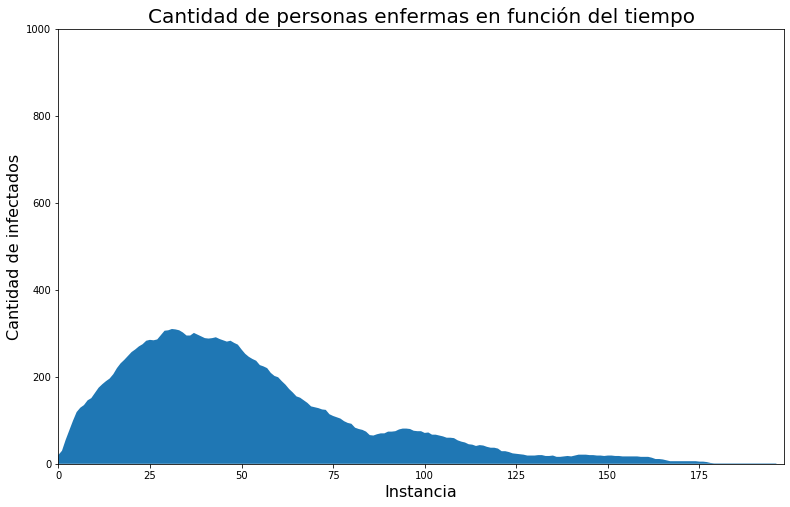

In [ ]:
plot1(df4[ df4["Infected"] == 1 ].groupby("TimeFrame").sum()["Infected"], "Cantidad de infectados", "Cantidad de personas enfermas en función del tiempo", 0, N_ITER_AUX)

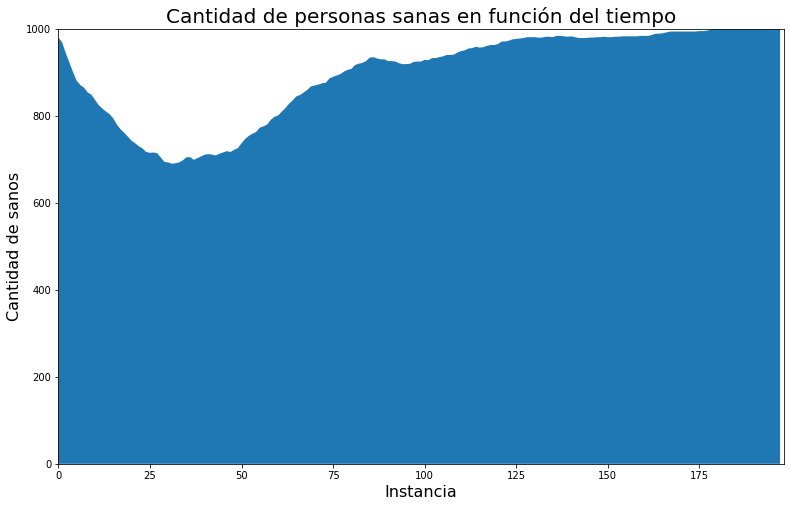

In [ ]:
plot1(df4[ df4["Infected"] == 0 ].groupby("TimeFrame").sum()["Healthy"], "Cantidad de sanos", "Cantidad de personas sanas en función del tiempo", 0, N_ITER_AUX)

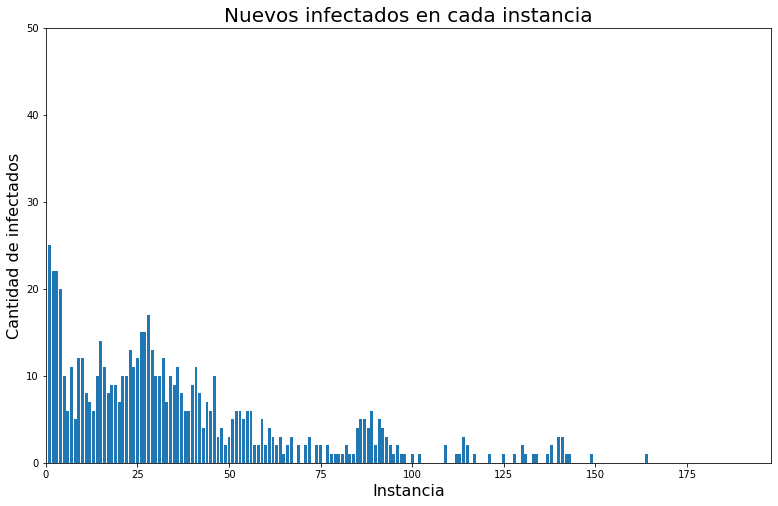

In [ ]:
plot3(infection_instance,"Nuevos infectados en cada instancia", "Cantidad de infectados")

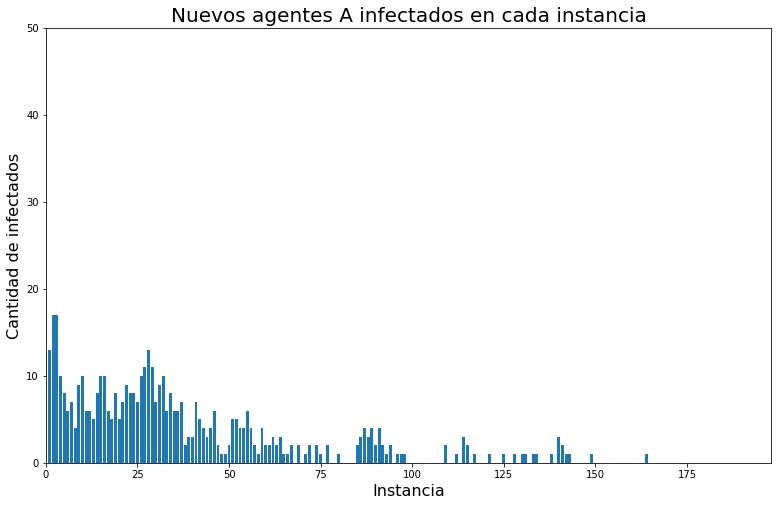

In [ ]:
plot3(infection_instanceA,"Nuevos agentes A infectados en cada instancia", "Cantidad de infectados")

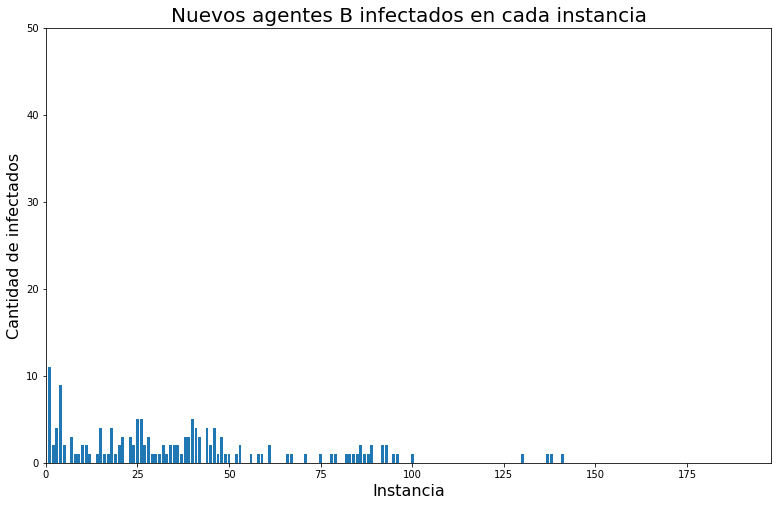

In [ ]:
plot3(infection_instanceB,"Nuevos agentes B infectados en cada instancia", "Cantidad de infectados")

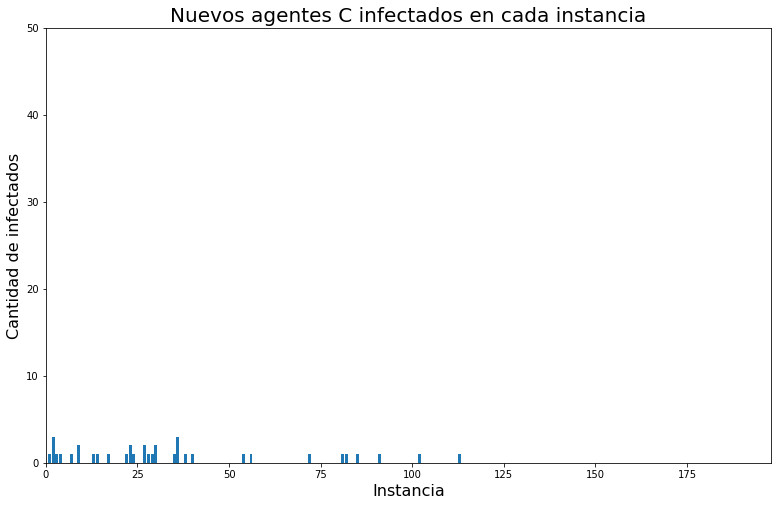

In [ ]:
plot3(infection_instanceC,"Nuevos agentes C infectados en cada instancia", "Cantidad de infectados")

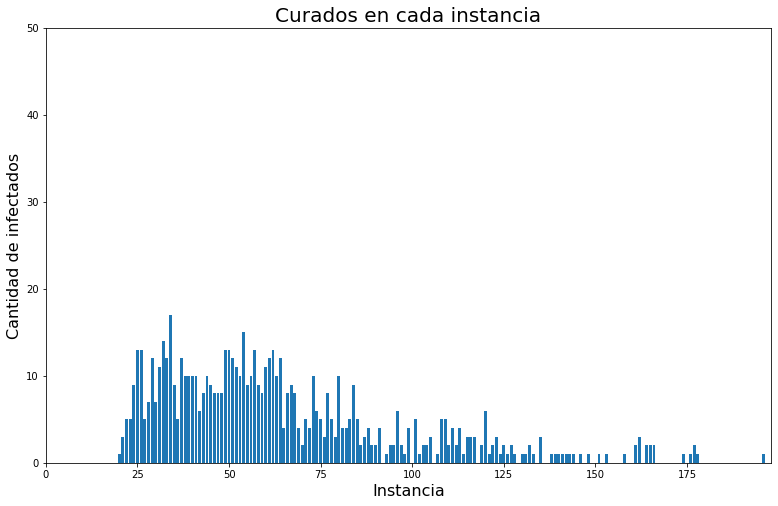

In [ ]:
plot3(heal_instance,"Curados en cada instancia", "Cantidad de curados")

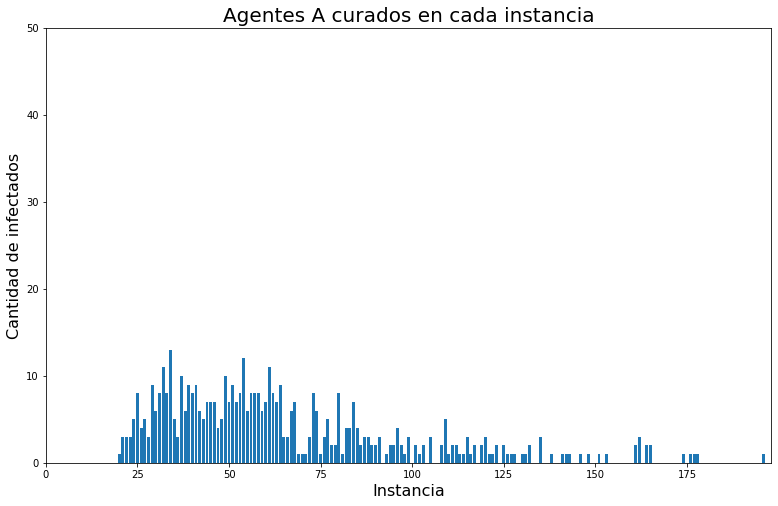

In [ ]:
plot3(heal_instanceA,"Agentes A curados en cada instancia", "Cantidad de curados")

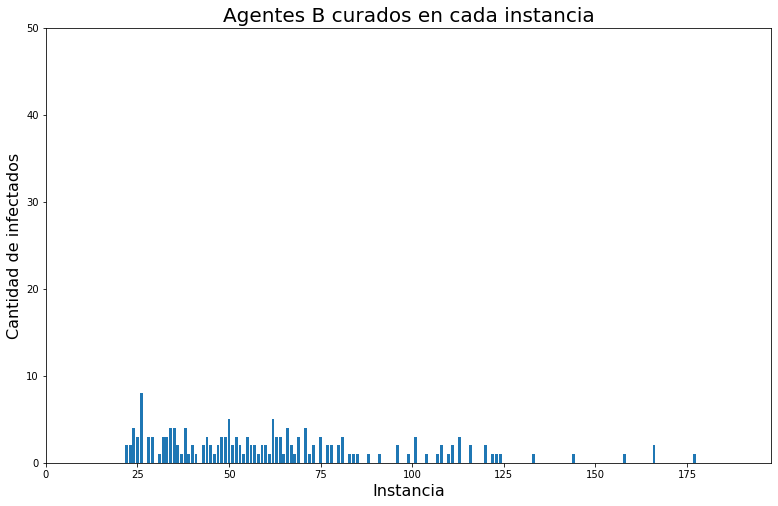

In [ ]:
plot3(heal_instanceB,"Agentes B curados en cada instancia", "Cantidad de curados")

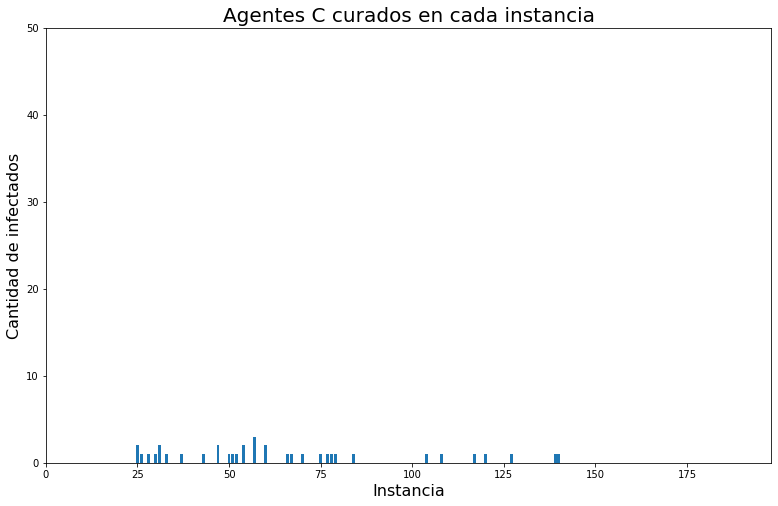

In [ ]:
plot3(heal_instanceC,"Agentes C curados en cada instancia", "Cantidad de curados")

In [ ]:
# Total infected
df_total = df4.groupby("id").sum()
df_total = df_total[ df_total["Infected"] > 0 ]["Infected"]
len( df_total.index.to_list() )

698